PZFlow Informer and Estimator Demo

Author: Tianqing Zhang

**Note:** If you're interested in running this in pipeline mode, see [`09_PZFlow.ipynb`](https://github.com/LSSTDESC/rail/blob/main/pipeline_examples/estimation_examples/09_PZFlow.ipynb) in the `pipeline_examples/estimation_examples/` folder.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qp
import rail.interactive as ri
import tables_io
from rail.utils.path_utils import find_rail_file

Install FSPS with the following commands:
pip uninstall fsps
git clone --recursive https://github.com/dfm/python-fsps.git
cd python-fsps
python -m pip install .
export SPS_HOME=$(pwd)/src/fsps/libfsps

LEPHAREDIR is being set to the default cache directory:
/home/jscora/.cache/lephare/data
More than 1Gb may be written there.
LEPHAREWORK is being set to the default cache directory:
/home/jscora/.cache/lephare/work
Default work cache is already linked. 
This is linked to the run directory:
/home/jscora/.cache/lephare/runs/20250404T163309


In [2]:
trainFile = find_rail_file("examples_data/testdata/test_dc2_training_9816.hdf5")
testFile = find_rail_file("examples_data/testdata/test_dc2_validation_9816.hdf5")
training_data = tables_io.read(trainFile)
test_data = tables_io.read(testFile)

In [3]:
pzflow_dict = dict(hdf5_groupname="photometry")

In [4]:
# epoch = 200 gives a reasonable converged loss
pzflow_model = ri.estimation.algos.pzflow_nf.pz_flow_informer(
    training_data=training_data, num_training_epochs=30, **pzflow_dict
)

Inserting handle into data store.  input: None, PZFlowInformer
Training 30 epochs 
Loss:
(0) 37.3273
(1) 9.1669
(2) 6.4421
(3) 4.7582
(4) 3.6947
(5) 2.8143
(6) 2.5248
(7) 2.0188
(8) 1.5276
(9) 1.6716
(10) 1.3869
(11) 0.8940
(12) 0.7905
(13) 0.3930
(14) 0.3385
(15) 1.3400
(16) 0.5224
(17) 0.3961
(18) -0.0943
(19) 0.0121
(20) -0.2339
(21) -0.2131
(22) -0.3180
(23) -0.1911
(24) -0.2839
(25) -0.0307
(26) -0.1930
(27) -0.4647
(28) 0.0816
(29) -0.4062
(30) -0.5171
Inserting handle into data store.  model: inprogress_model.pkl, PZFlowInformer


In [8]:
pzflow_model

{'model': None}

At the moment, PZFlow saves its model file directly, so we'll use that file name instead of the model output from the stage above. 

In [5]:
pzflow_dict = dict(hdf5_groupname="photometry")

pzflow_estimator = ri.estimation.algos.pzflow_nf.pz_flow_estimator(
    input_data=test_data, model="inprogress_model.pkl", **pzflow_dict, chunk_size=20000
)

Inserting handle into data store.  input: None, PZFlowEstimator
Inserting handle into data store.  model: inprogress_model.pkl, PZFlowEstimator
Process 0 running estimator on chunk 0 - 20,449


/home/jscora/testing/qp/src/qp/parameterizations/interp/interp.py:187: UserWarning: The distributions at indices = [ 6919 17601] have an integral of 0.
  warnings.warn(
/home/jscora/testing/qp/src/qp/parameterizations/interp/interp.py:207: RuntimeWarning: invalid value encountered in divide
  new_yvals = (self._yvals.T / self._ycumul[:, -1]).T
/home/jscora/testing/qp/src/qp/parameterizations/interp/interp.py:208: RuntimeWarning: invalid value encountered in divide
  self._ycumul = (self._ycumul.T / self._ycumul[:, -1]).T
/home/jscora/testing/qp/src/qp/parameterizations/interp/interp.py:140: RuntimeWarning: There are non-finite values in the yvals for the following distributions: (array([ 6919,  6919,  6919,  6919,  6919,  6919,  6919,  6919,  6919,
        6919,  6919,  6919,  6919,  6919,  6919,  6919,  6919,  6919,
        6919,  6919,  6919,  6919,  6919,  6919,  6919,  6919,  6919,
        6919,  6919,  6919,  6919,  6919,  6919,  6919,  6919,  6919,
        6919,  6919,  6919,  69

Inserting handle into data store.  output: inprogress_output.hdf5, PZFlowEstimator


In [6]:
mode = pzflow_estimator["output"].ancil["zmode"]
truth = np.array(test_data["photometry"]["redshift"])

Text(0, 0.5, 'Mode of Estimated Redshift')

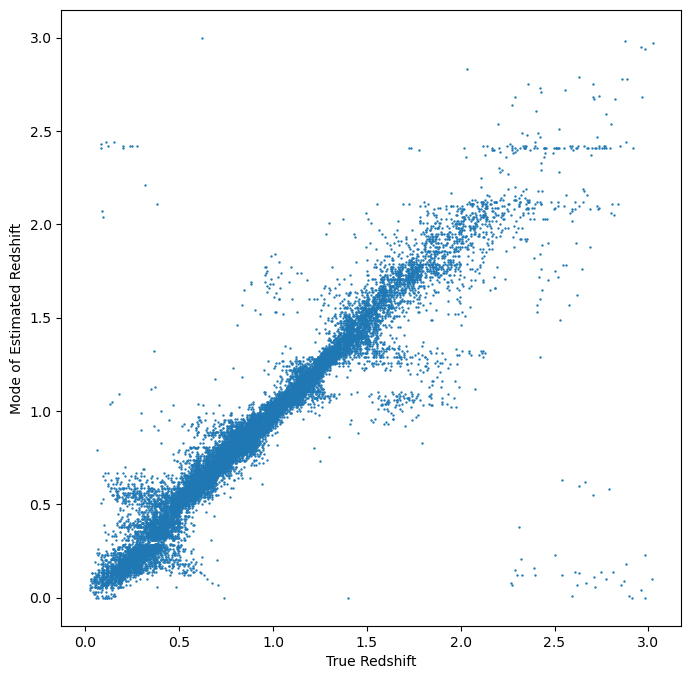

In [7]:
# visualize the prediction.
plt.figure(figsize=(8, 8))
plt.scatter(truth, mode, s=0.5)
plt.xlabel("True Redshift")
plt.ylabel("Mode of Estimated Redshift")